In [4]:
import csv
import pandas as pd
%matplotlib inline 
import os
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import warnings
import MySQLdb
from sklearn import metrics
import pandas as pd
import time
import timeit
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
warnings.filterwarnings('ignore')

C:\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
#Enter the values for my database connection
dsn_database = "research" 
dsn_hostname = "35.185.12.138"      
dsn_port = 3306
dsn_uid = "root"   
dsn_pwd = "8466"

In [6]:
#Enter information for database2, my local database
dsn_database2 = "local_test" 
dsn_hostname2 = "127.0.0.1"      
dsn_port2 = 3306
dsn_uid2 = "root"   
dsn_pwd2 = "8466"

In [7]:
conn2 = MySQLdb.connect(host=dsn_hostname2, port=dsn_port2, user=dsn_uid2, passwd=dsn_pwd2, db=dsn_database2)

In [8]:
conn = MySQLdb.connect(host=dsn_hostname, port=dsn_port, user=dsn_uid, passwd=dsn_pwd, db=dsn_database)

In [9]:
cur=conn.cursor()

In [10]:
df_blue=pd.read_csv('LOL_blue_Baron_Dragon_Herald_Inhibs_Tower_gold_blue.csv')

In [11]:
df_red=pd.read_csv('LOL_red_Baron_Dragon_Herald_Inhibs_Tower_gold_kill.csv')

In [12]:
df_blue.head(2)

,Unnamed: 0,MatchID,gamelength,TeamColor,TeamTag,TeamID,Result,DragonValue,BaronValue,Herald,InhibitsValue,TowerValue,GoldIn10,GoldIn20,kill
0,0,0,40,blue,TSM,0,1,1,0,0,2,9,11361,29519,12
1,1,1,38,blue,CST,1,0,3,1,0,0,7,11419,27282,11


In [13]:
df_red.head(2)

,Unnamed: 0,MatchID,gamelength,TeamColor,TeamTag,TeamID,Result,DragonValue,BaronValue,Herald,InhibitsValue,TowerValue,GoldIn10,GoldIn20,kill
0,0,0,40,red,C9,3802,0,1,1,0,0,4,11986,28097,1
1,1,1,38,red,DIG,3803,1,3,0,0,1,7,11661,26177,16


In [14]:
pd_LOL=df_blue.append(df_red, ignore_index=True)
pd_LOL

,Unnamed: 0,MatchID,gamelength,TeamColor,TeamTag,TeamID,Result,DragonValue,BaronValue,Herald,InhibitsValue,TowerValue,GoldIn10,GoldIn20,kill
0,0,0,40,blue,TSM,0,1,1,0,0,2,9,11361,29519,12
1,1,1,38,blue,CST,1,0,3,1,0,0,7,11419,27282,11
2,2,2,40,blue,WFX,2,1,4,1,0,4,15,12374,31317,16
3,3,3,41,blue,TIP,3,0,0,1,0,0,4,12033,25772,18
4,4,4,35,blue,CLG,4,1,2,1,0,1,8,11943,27472,6
5,5,5,24,blue,DIG,5,0,0,0,0,0,0,11606,26493,18
6,6,6,39,blue,CST,6,1,3,1,0,2,10,12795,29047,12
7,7,7,43,blue,TL,7,1,3,2,0,3,11,11667,27486,12
8,8,8,41,blue,C9,8,0,0,1,0,0,6,12921,29127,10
9,9,9,32,blue,T8,9,1,1,1,0,3,11,12316,28028,3


In [15]:
pd_LOL['intercept']=1.0
pd_LOL.head(2)

,Unnamed: 0,MatchID,gamelength,TeamColor,TeamTag,TeamID,Result,DragonValue,BaronValue,Herald,InhibitsValue,TowerValue,GoldIn10,GoldIn20,kill,intercept
0,0,0,40,blue,TSM,0,1,1,0,0,2,9,11361,29519,12,1.0
1,1,1,38,blue,CST,1,0,3,1,0,0,7,11419,27282,11,1.0


In [16]:
pd_LOL.apply(lambda x: sum(x.isnull()),axis=0) 

Unnamed: 0       0
MatchID          0
gamelength       0
TeamColor        0
TeamTag          1
TeamID           0
Result           0
DragonValue      0
BaronValue       0
Herald           0
InhibitsValue    0
TowerValue       0
GoldIn10         0
GoldIn20         0
kill             0
intercept        0
dtype: int64

In [225]:
pd_LOL.dropna(inplace=True)

In [226]:
pred=['gamelength','DragonValue','GoldIn10','GoldIn20','Herald','BaronValue','InhibitsValue','TowerValue','kill']
pd_LOL[pred]
logistic_model =sm.Logit(pd_LOL['Result'], pd_LOL[pred]).fit()
logistic_model.summary()

Optimization terminated successfully.
         Current function value: 0.099054
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Result   No. Observations:                 7603
Model:                          Logit   Df Residuals:                     7594
Method:                           MLE   Df Model:                            8
Date:                Fri, 15 Dec 2017   Pseudo R-squ.:                  0.8571
Time:                        14:07:54   Log-Likelihood:                -753.10
converged:                       True   LL-Null:                       -5270.0
                                        LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
gamelength       -0.1703      0.010    -17.691      0.000      -0.189      -0.151
DragonValue       0.0594      0.054      1.103      0.270      -0.046       0.165
GoldIn10         -0.0003   6.49e-05     -4.448      0.000      -0.000      -0.000
GoldIn20      -6.053e-05   2.71e-05     -2.235      0.025      -0.000   -7.44e-06
Herald           -0.1321      0.084     -1.568      0.117      -0.297       0.033
BaronValue        0.2153      0.094      2.300      0.021       0.032       0.399
InhibitsValue    -0.2859      0.074     -3.878      0.000      -0.430      -0.141
TowerValue        1.8170      0.064     28.447      0.000       1.692       1.942
kill              0.0003      0.010      0.033      0.974      -0.020       0.020
=================================================================================
"""

In [227]:
X=pd_LOL[pred]
y=pd_LOL['Result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .4, random_state=0)
lr = LogisticRegression(C=1e9)
# Logistic regression metrics
LRm = lr.fit(X_train, y_train)
y_pred = LRm.predict(X_test)
print("Accuracy score using Logistic regression is %s" %metrics.accuracy_score(y_test, y_pred))

Accuracy score using Logistic regression is 0.960880999343


The accuracy is high.


Here we see, To win a game,gold in 10, gold in 20 is important, and also the BaronValue, the InhibitsValue, and the Towervalue.
For every unit change in Baron, the log odds of being a winner will decrease by 0.2153
For every unit change in Tower I knocked down, the log odds of being a winner will decrease by 1.8170

               gamelength  DragonValue  GoldIn10  GoldIn20    Herald  \
gamelength       1.000000     0.305670 -0.079343 -0.071739 -0.061532   
DragonValue      0.305670     1.000000 -0.034244 -0.047081  0.030689   
GoldIn10        -0.079343    -0.034244  1.000000  0.300339  0.345111   
GoldIn20        -0.071739    -0.047081  0.300339  1.000000  0.128387   
Herald          -0.061532     0.030689  0.345111  0.128387  1.000000   
BaronValue       0.352054     0.085581  0.140040 -0.015408  0.063043   
InhibitsValue    0.207425     0.063015  0.195925 -0.008158  0.137515   
TowerValue       0.184987     0.049155  0.268192 -0.022272  0.189879   
kill            -0.007091     0.002008 -0.009053  0.007894  0.017372   

               BaronValue  InhibitsValue  TowerValue      kill  
gamelength       0.352054       0.207425    0.184987 -0.007091  
DragonValue      0.085581       0.063015    0.049155  0.002008  
GoldIn10         0.140040       0.195925    0.268192 -0.009053  
GoldIn20        -0.

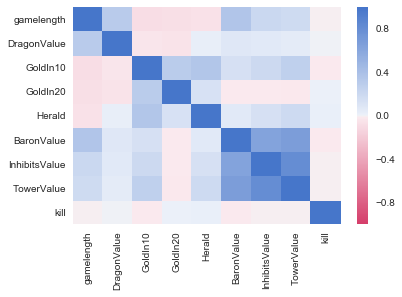

In [228]:
cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)
correlations =pd_LOL[['gamelength','DragonValue','GoldIn10','GoldIn20','Herald','BaronValue','InhibitsValue','TowerValue','kill']].corr()
print (correlations)
sns.heatmap(correlations, cmap=cmap)

Here I want to see if there is a relationship between the champion chosen and the result of the match


Fist,get the result of and champion of blue team

In [229]:
df_ChampionAndResult= pd.read_sql('SELECT blueTopChamp,blueJungleChamp,blueMiddleChamp,blueADCChamp,blueSupportChamp,bResult FROM local_test.leagueoflegends;', con=conn2)
df_ChampionAndResult=df_ChampionAndResult.iloc[1:]

In [230]:
df_ChampionAndResult.head(2)

,blueTopChamp,blueJungleChamp,blueMiddleChamp,blueADCChamp,blueSupportChamp,bResult
1,Irelia,RekSai,Ahri,Jinx,Janna,1
2,Gnar,Rengar,Ahri,Caitlyn,Leona,0


In [231]:
df_ChampionAndResult.to_csv('BlueTeamCham.csv')

In [232]:
df_ChampionAndResult= pd.read_sql('SELECT redTopChamp,blueJungleChamp,blueMiddleChamp,blueADCChamp,blueSupportChamp,bResult FROM local_test.leagueoflegends;', con=conn2)
df_ChampionAndResult=df_ChampionAndResult.iloc[1:]

In professional matches, if the game length is too short(here we take it to be less than 25 min),it normally means that the level of the two teams is very huge, here we want to see the difference of teams from different leagues

 Here we see the Baron value,Inhibts value and Tower Value have some relationship with each other.

In [233]:
df_dataFromDifferentArea = pd.read_sql("SELECT League,count(*) FROM research.df_1NF_TABLE_LeafueofLegends where df_1NF_TABLE_LeafueofLegends.gamelength< 25 group by League;", con=conn)
df_dataFromDifferentArea 

,League,count(*)
0,CBLOL,6
1,Europe,9
2,LCK,10
3,LMS,13
4,Mid-Season_Invitational,4
5,North_America,10
6,Season_World_Championship,14


In [234]:
df_TotaldataFromDifferentArea = pd.read_sql("select league,count(League) from df_1NF_TABLE_LeafueofLegends GROUP BY League", con=conn)
df_TotaldataFromDifferentArea 


,league,count(League)
0,CBLOL,213
1,Europe,754
2,LCK,1101
3,LMS,540
4,Mid-Season_Invitational,111
5,North_America,855
6,Season_World_Championship,228


In [235]:
df_LevelDifference_rate_of_Leagues = df_dataFromDifferentArea['count(*)'].div(df_TotaldataFromDifferentArea['count(League)'], axis='index')
pd.to_numeric(df_LevelDifference_rate_of_Leagues)
#df_LevelDifference_rate_of_Leagues=df_LevelDifference_rate_of_Leagues.Series.to_Frame()
df_LevelDifference_rate_of_Leagues=pd.DataFrame({'index':df_LevelDifference_rate_of_Leagues.index, 'rate':df_LevelDifference_rate_of_Leagues.values})

In [236]:
df_LevelDifference_rate_of_Leagues['League']=df_dataFromDifferentArea['League']
df_LevelDifference_rate_of_Leagues.columns = ['index', 'rate', 'League']
df_LevelDifference_rate_of_Leagues

,index,rate,League
0,0,0.028169,CBLOL
1,1,0.011936,Europe
2,2,0.009083,LCK
3,3,0.024074,LMS
4,4,0.036036,Mid-Season_Invitational
5,5,0.011696,North_America
6,6,0.061404,Season_World_Championship


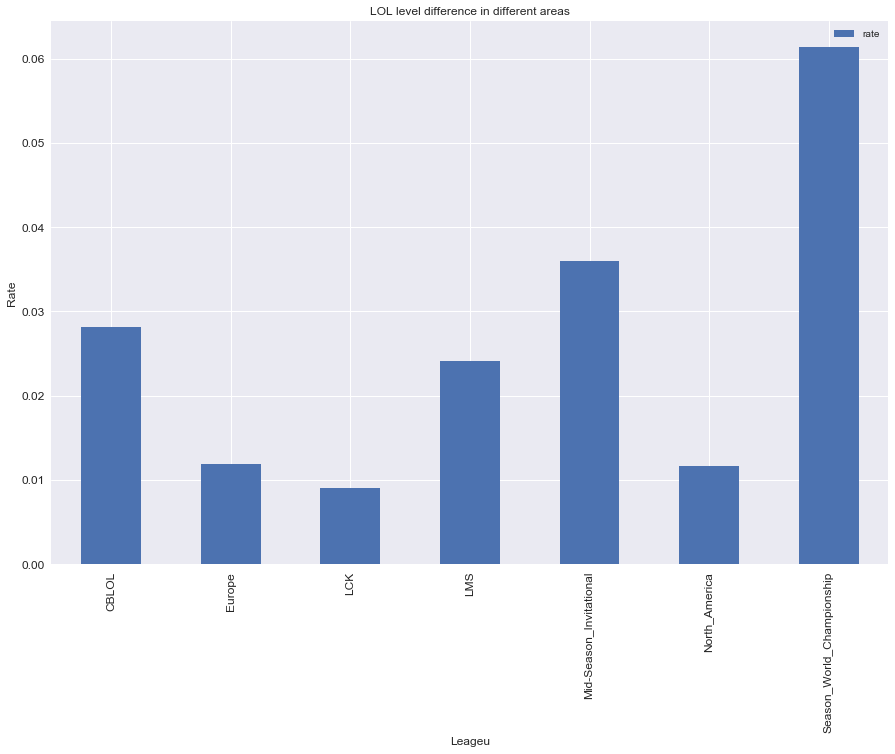

In [237]:
ax = df_LevelDifference_rate_of_Leagues[['League','rate']].plot(kind='bar', title ="LOL level difference in different areas",figsize=(15,10),legend=True, fontsize=12)
ax.set_xlabel("Leageu",fontsize=12)
ax.set_ylabel("Rate",fontsize=12)
labels=['CBLOL','Europe','LCK','LMS','Mid-Season_Invitational','North_America','Season_World_Championship']
ax.set_xticklabels(labels, fontdict=None, minor=False)

As we can see from above, the big level difference between the two beating teams from Europe is very low, while this difference is larger in the season_world_Championship, which is reasonable. In total, this rate is not high in all of the Leagues, so we can conclude, the level difference of the two teams in professional matches are very small.

We want to discover the change of the win rate of the blue time according to the Game length

In [238]:
df_blueWinAccordingToTime= pd.read_sql("SELECT count(*),gamelength FROM research.df_1NF_TABLE_LeafueofLegends WHERE df_1NF_TABLE_LeafueofLegends.bResult = 1 group by df_1NF_TABLE_LeafueofLegends.gamelength;", con=conn)
df_blueWinAccordingToTime = df_blueWinAccordingToTime.set_index('gamelength')

In [239]:
df_allAccordingToTime= pd.read_sql('SELECT count(*),gamelength FROM research.df_1NF_TABLE_LeafueofLegends group by df_1NF_TABLE_LeafueofLegends.gamelength;', con=conn)
df_allAccordingToTime = df_allAccordingToTime.set_index('gamelength')

In [240]:
df_blueWinAccordingToTimeFull = df_allAccordingToTime.copy()
df_blueWinAccordingToTimeFull['count(*)'] = df_blueWinAccordingToTime['count(*)']
df_blueWinAccordingToTimeFull[df_blueWinAccordingToTimeFull['count(*)'].isnull()] = 0
df_blueWinAccordingToTimeFull

,count(*)
gamelength,
19,1.0
20,1.0
21,4.0
22,7.0
23,9.0
24,16.0
25,23.0
26,42.0
27,57.0


In [241]:
blue_win_rate_according_to_time_difference = df_blueWinAccordingToTimeFull['count(*)'].div(df_allAccordingToTime['count(*)'], axis='index')
blue_win_rate_according_to_time_difference

gamelength
19    1.000000
20    0.333333
21    0.800000
22    0.777778
23    0.529412
24    0.516129
25    0.605263
26    0.545455
27    0.647727
28    0.652893
29    0.602941
30    0.574713
31    0.670659
32    0.552326
33    0.514451
34    0.563107
35    0.507042
36    0.566502
37    0.527778
38    0.532967
39    0.485549
40    0.562500
41    0.558282
42    0.470149
43    0.503597
44    0.496124
45    0.551020
46    0.533333
47    0.442857
48    0.393939
49    0.448276
50    0.645833
51    0.487805
52    0.647059
53    0.636364
54    0.360000
55    0.300000
56    0.529412
57    0.545455
58    0.400000
59    0.555556
60    0.625000
61    0.625000
62    0.500000
63    0.800000
64    0.500000
65    1.000000
67    1.000000
68    0.750000
69    1.000000
70    0.000000
71    0.000000
72    0.666667
74    0.000000
78    0.000000
81    1.000000
Name: count(*), dtype: float64

In [242]:
a=blue_win_rate_according_to_time_difference-0.5

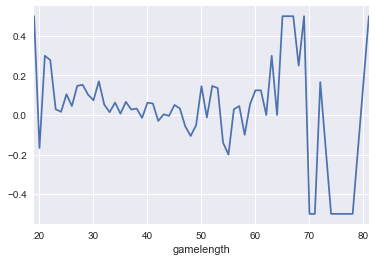

In [243]:
a.plot()

I compare the win rate of the blue team with 0.5, according to the graph, we can know,in most of the times, the win rate of the blue team is larger than 0.5, the win rate of blue team becomes extremely high when the length of the match is between 60 and 70, however if the gamelength is larger than 70, the win rate of blue team drop in a sudden.

In [244]:
AllChampionsWhenBlueWin= pd.read_sql('SELECT blueTopChamp,blueJungleChamp,blueMiddleChamp,blueADCChamp,blueSupportChamp FROM local_test.leagueoflegends where bResult = 1;', con=conn2)


In [245]:
TOPChampionsWhenBlueWin =AllChampionsWhenBlueWin.groupby(by='blueTopChamp').size().sort_values()
JungleChampionsWhenBlueWin=AllChampionsWhenBlueWin.groupby(by='blueJungleChamp').size().sort_values()
MiddleChampionsWhenBlueWin=AllChampionsWhenBlueWin.groupby(by='blueMiddleChamp').size().sort_values()
ADCChampionsWhenBlueWin=AllChampionsWhenBlueWin.groupby(by='blueADCChamp').size().sort_values()
SupportChampionsWhenBlueWin=AllChampionsWhenBlueWin.groupby(by='blueSupportChamp').size().sort_values()


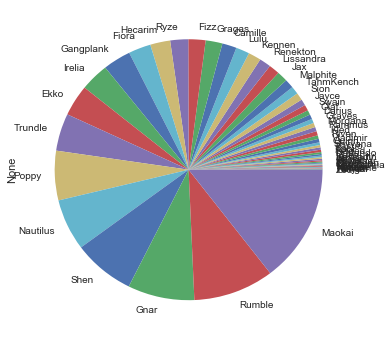

In [246]:
TOPChampionsWhenBlueWin.plot.pie(figsize=(6, 6))

When blue team wins, the most popular TOP Champion to choose from are Maokai,Rumble,Gnar,Shen,Nautilus and Poppy

Here I want to find the BP rate of MaoKai, the most popular TOP

In [259]:
res = cur.execute('set @a1 = (SELECT count(*) FROM research.df_1NF_TABLE_ban Where df_1NF_TABLE_ban.Champion="Rumble"); set @a2 = (SELECT count(*) FROM research.df_1NF_TABLE_Team_small WHERE Champion = "Rumble"); set @total =( SELECT count(*) FROM research.df_1NF_TABLE_LeafueofLegends);select (@a1+@a2)/@total as RATE_BP;')
data = cur.fetchall()
data

()

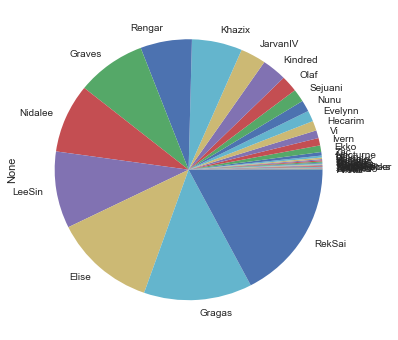

In [260]:
JungleChampionsWhenBlueWin.plot.pie(figsize=(6, 6))

When blue team wins, the most poopular jungle champions to choose are RakSai,Gragas,Elise,LeeSin,Nidalee

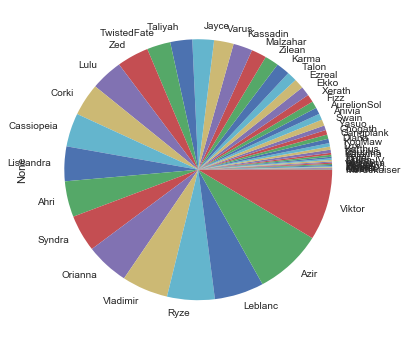

In [266]:
MiddleChampionsWhenBlueWin.plot.pie(figsize=(6, 6))

The middle Champions to choose from are very diverse, Viktor,Azir,,Leblanc,Ryzeand Vladimir are some popular ones

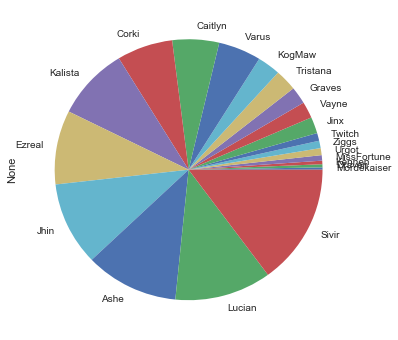

In [274]:
ADCChampionsWhenBlueWin.plot.pie(figsize=(6, 6))

The popular ADC Champions to choose from are Sivir,Lucian,Ashe,Jhin,Ezreal and Kalista

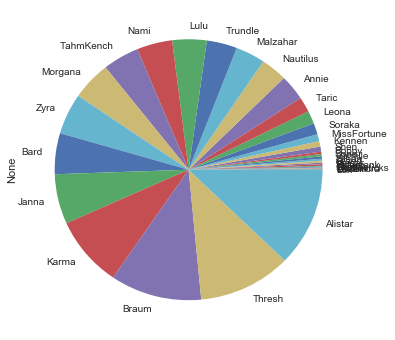

In [283]:
SupportChampionsWhenBlueWin.plot.pie(figsize=(6, 6))

The popular support Champion to choose from are Alistar,Thresh, Braum,,Karma and Janna

In [ ]:
AllTableTopWithMaokai_blue= pd.read_sql('SELECT local_test.leagueoflegends.blueTopChamp,local_test.leagueoflegends.redTopChamp,count(*) FROM local_test.leagueoflegends where local_test.leagueoflegends.blueTopChamp="Maokai"  group by local_test.leagueoflegends.redTopChamp;', con=conn2)
AllTableTopWithMaokai_blue.columns = ['Character', 'OtherSide','count(*)']
AllTableTopWithMaokai_blue.set_index('OtherSide', inplace=True)
AllTableTopWithMaokai_blue

In [ ]:
AllTableTopWithMaokai_red= pd.read_sql('SELECT local_test.leagueoflegends.redTopChamp,local_test.leagueoflegends.blueTopChamp,count(*) FROM local_test.leagueoflegends where local_test.leagueoflegends.redTopChamp="Maokai"  group by local_test.leagueoflegends.blueTopChamp;', con=conn2)
AllTableTopWithMaokai_red.columns = ['Character', 'OtherSide','count(*)']
AllTableTopWithMaokai_red.set_index('OtherSide', inplace=True)
AllTableTopWithMaokai_red

In [ ]:
df_Maokai_all = pd.DataFrame(index=set(list(AllTableTopWithMaokai_red.index) + list(AllTableTopWithMaokai_blue.index)))
df_Maokai_all['count(*)'] = 0
df_Maokai_all.loc[AllTableTopWithMaokai_red.index] = AllTableTopWithMaokai_red[['count(*)']]
df_Maokai_all.loc[AllTableTopWithMaokai_blue.index] += AllTableTopWithMaokai_blue[['count(*)']]
df_Maokai_all

In [ ]:
#AllTableTopWithMaokai_Win=pd.read_sql('SELECT local_test.leagueoflegends.blueTopChamp,local_test.leagueoflegends.redTopChamp,count(*) FROM local_test.leagueoflegends where (local_test.leagueoflegends.blueTopChamp="Maokai") AND (leagueoflegends.bResult="0") group by local_test.leagueoflegends.redTopChamp;', con=conn2)
AllTableTopWithMaokai_Win_blue= pd.read_sql('SELECT local_test.leagueoflegends.blueTopChamp,local_test.leagueoflegends.redTopChamp,count(*) FROM local_test.leagueoflegends where (local_test.leagueoflegends.blueTopChamp="Maokai") AND (leagueoflegends.bResult="0") group by local_test.leagueoflegends.redTopChamp;', con=conn2)
AllTableTopWithMaokai_Win_blue.columns = ['Character', 'OtherSide','count(*)']
AllTableTopWithMaokai_Win_blue.set_index('OtherSide', inplace=True)
AllTableTopWithMaokai_Win_blue

In [ ]:
AllTableTopWithMaokai_Win_red= pd.read_sql('SELECT local_test.leagueoflegends.redTopChamp,local_test.leagueoflegends.blueTopChamp,count(*) FROM local_test.leagueoflegends where (local_test.leagueoflegends.redTopChamp="Maokai") AND (leagueoflegends.bResult="1") group by local_test.leagueoflegends.blueTopChamp;', con=conn2)
AllTableTopWithMaokai_Win_red.columns = ['Character', 'OtherSide','count(*)']
AllTableTopWithMaokai_Win_red.set_index('OtherSide', inplace=True)
AllTableTopWithMaokai_Win_red

In [ ]:
df_Maokai_win_all = pd.DataFrame(index=set(list(AllTableTopWithMaokai_Win_red.index) + list(AllTableTopWithMaokai_Win_blue.index)))
df_Maokai_win_all['count(*)'] = 0
df_Maokai_win_all.loc[AllTableTopWithMaokai_Win_red.index] = AllTableTopWithMaokai_Win_red[['count(*)']]
df_Maokai_win_all.loc[AllTableTopWithMaokai_Win_blue.index] += AllTableTopWithMaokai_Win_blue[['count(*)']]
df_Maokai_win_all

In [ ]:
Win_rate =df_Maokai_win_all['count(*)'].div(df_Maokai_all['count(*)'], axis='index', fill_value=0)

In [ ]:
win_rate_maokai_column=Win_rate.to_frame()

In [ ]:
df_Maokai_all['win_rate']=win_rate_maokai_column['count(*)']

In [ ]:
df_Maokai_all.sort_values(by=['win_rate'],ascending=False,inplace = True)

In [ ]:
df_Maokai_all=df_Maokai_all[df_Maokai_all['count(*)'] > 5]

In [ ]:
champion_list_name=df_Maokai_all.index.values

In [ ]:
ax =df_Maokai_all[['win_rate']].plot(kind='bar', title ="different champion win Maokai",figsize=(15,10),legend=True, fontsize=12)
ax.set_xlabel("TopChamp",fontsize=12)
ax.set_ylabel("win_MaoKai_rate",fontsize=12)
labels=champion_list_name
ax.set_xticklabels(labels, fontdict=None, minor=False)

The graph above is the win rate of different characters against MaoKai

In [2]:
def get_graph(Charactor,Location):
   
    a='SELECT local_test.leagueoflegends.blue'+Location+'Champ,local_test.leagueoflegends.red'+Location+'Champ,count(*) FROM local_test.leagueoflegends where local_test.leagueoflegends.blue'+Location+'Champ="'+Charactor+'"  group by local_test.leagueoflegends.red'+Location+'Champ;'
    AllTableTopWithMaokai_blue= pd.read_sql(a, con=conn2)
    AllTableTopWithMaokai_blue.columns = ['Character', 'OtherSide','count(*)']
    AllTableTopWithMaokai_blue.set_index('OtherSide', inplace=True)

    b='SELECT local_test.leagueoflegends.red'+Location+'Champ,local_test.leagueoflegends.blue'+Location+'Champ,count(*) FROM local_test.leagueoflegends where local_test.leagueoflegends.red'+Location+'Champ="'+Charactor+'"  group by local_test.leagueoflegends.blue'+Location+'Champ;'
    AllTableTopWithMaokai_red= pd.read_sql(b, con=conn2)
    AllTableTopWithMaokai_red.columns = ['Character', 'OtherSide','count(*)']
    AllTableTopWithMaokai_red.set_index('OtherSide', inplace=True)
   


    df_Maokai_all = pd.DataFrame(index=set(list(AllTableTopWithMaokai_red.index) + list(AllTableTopWithMaokai_blue.index)))
    df_Maokai_all['count(*)'] = 0
    df_Maokai_all.loc[AllTableTopWithMaokai_red.index] = AllTableTopWithMaokai_red[['count(*)']]
    df_Maokai_all.loc[AllTableTopWithMaokai_blue.index] += AllTableTopWithMaokai_blue[['count(*)']]

    
    
    c='SELECT local_test.leagueoflegends.blue'+Location+'Champ,local_test.leagueoflegends.red'+Location+'Champ,count(*) FROM local_test.leagueoflegends where (local_test.leagueoflegends.blue'+Location+'Champ="'+Charactor+'") AND (leagueoflegends.bResult="0") group by local_test.leagueoflegends.red'+Location+'Champ;'
    AllTableTopWithMaokai_Win_blue= pd.read_sql(c, con=conn2)
    AllTableTopWithMaokai_Win_blue.columns = ['Character', 'OtherSide','count(*)']
    AllTableTopWithMaokai_Win_blue.set_index('OtherSide', inplace=True)

    
    d='SELECT local_test.leagueoflegends.red'+Location+'Champ,local_test.leagueoflegends.blue'+Location+'Champ,count(*) FROM local_test.leagueoflegends where (local_test.leagueoflegends.red'+Location+'Champ="'+Charactor+'") AND (leagueoflegends.bResult="1") group by local_test.leagueoflegends.blue'+Location+'Champ;'
    AllTableTopWithMaokai_Win_red= pd.read_sql(d, con=conn2)
    AllTableTopWithMaokai_Win_red.columns = ['Character', 'OtherSide','count(*)']
    AllTableTopWithMaokai_Win_red.set_index('OtherSide', inplace=True)


    df_Maokai_win_all = pd.DataFrame(index=set(list(AllTableTopWithMaokai_Win_red.index) + list(AllTableTopWithMaokai_Win_blue.index)))
    df_Maokai_win_all['count(*)'] = 0
    df_Maokai_win_all.loc[AllTableTopWithMaokai_Win_red.index] = AllTableTopWithMaokai_Win_red[['count(*)']]
    df_Maokai_win_all.loc[AllTableTopWithMaokai_Win_blue.index] += AllTableTopWithMaokai_Win_blue[['count(*)']]

    Win_rate =df_Maokai_win_all['count(*)'].div(df_Maokai_all['count(*)'], axis='index', fill_value=0)
    win_rate_maokai_column=Win_rate.to_frame()
    df_Maokai_all['win_rate']=win_rate_maokai_column['count(*)']
    df_Maokai_all.sort_values(by=['win_rate'],ascending=False,inplace = True)
    df_Maokai_all=df_Maokai_all[df_Maokai_all['count(*)'] > 5]
    champion_list_name=df_Maokai_all.index.values

    
    ax =df_Maokai_all[['win_rate']].plot(kind='bar', title ="different champion win"+Charactor,figsize=(15,10),legend=True, fontsize=12)
    ax.set_xlabel(Location+"Champ",fontsize=12)
    ax.set_ylabel("win_"+Charactor+"_rate",fontsize=12)
    labels=champion_list_name
    ax.set_xticklabels(labels, fontdict=None, minor=False)
    return df_Maokai_all
    

,count(*),win_rate
Kassadin,6,0.833333
Riven,10,0.700000
Camille,14,0.642857
Ryze,14,0.571429
Jax,7,0.571429
Hecarim,27,0.555556
Poppy,9,0.555556
Fizz,21,0.523810
Gnar,88,0.522727
Renekton,18,0.500000


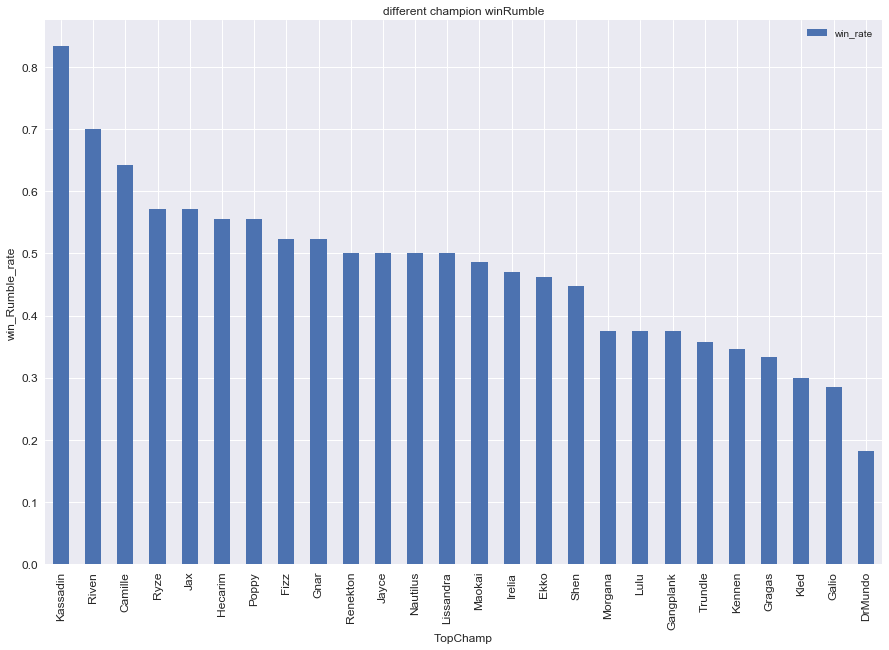

In [253]:
get_graph("Rumble","Top")

,count(*),win_rate
Malphite,6,0.833333
Sion,18,0.666667
Gragas,27,0.592593
Illaoi,7,0.571429
Singed,9,0.555556
Swain,9,0.555556
Ekko,74,0.540541
Irelia,30,0.533333
Shen,104,0.528846
Fiora,19,0.526316


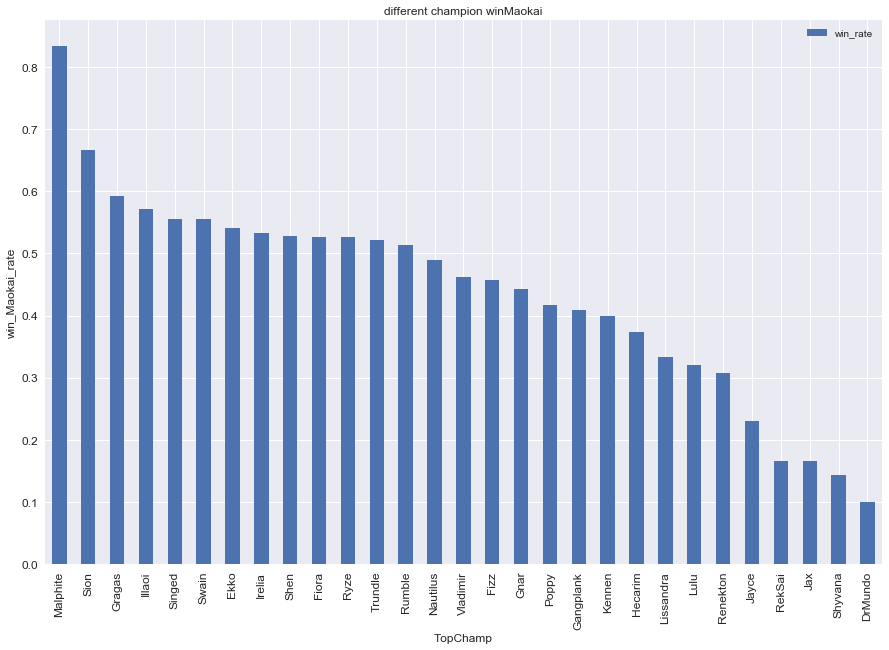

In [254]:
get_graph("Maokai","Top")

,count(*),win_rate
Yasuo,7,0.714286
Poppy,12,0.666667
Jax,8,0.625000
Gangplank,34,0.617647
Fiora,10,0.600000
Lulu,20,0.600000
Maokai,104,0.557692
Hecarim,29,0.551724
Kennen,20,0.550000
Fizz,11,0.545455


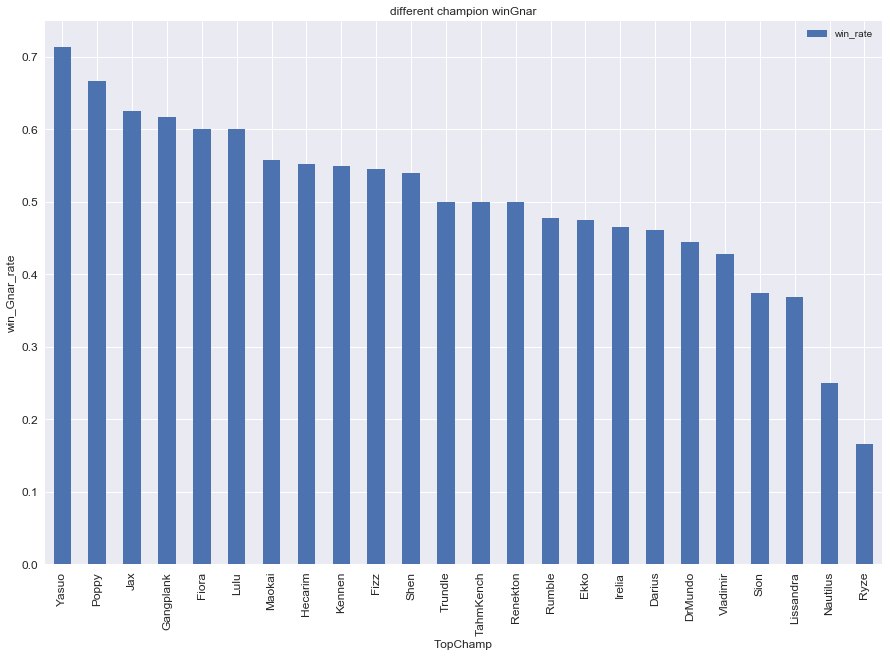

In [256]:
get_graph("Gnar","Top")

,count(*),win_rate
Ryze,6,0.666667
Ekko,16,0.625000
Trundle,41,0.609756
Fizz,7,0.571429
Rumble,38,0.552632
Nautilus,62,0.548387
Fiora,13,0.538462
Gangplank,58,0.534483
Jax,8,0.500000
Olaf,6,0.500000


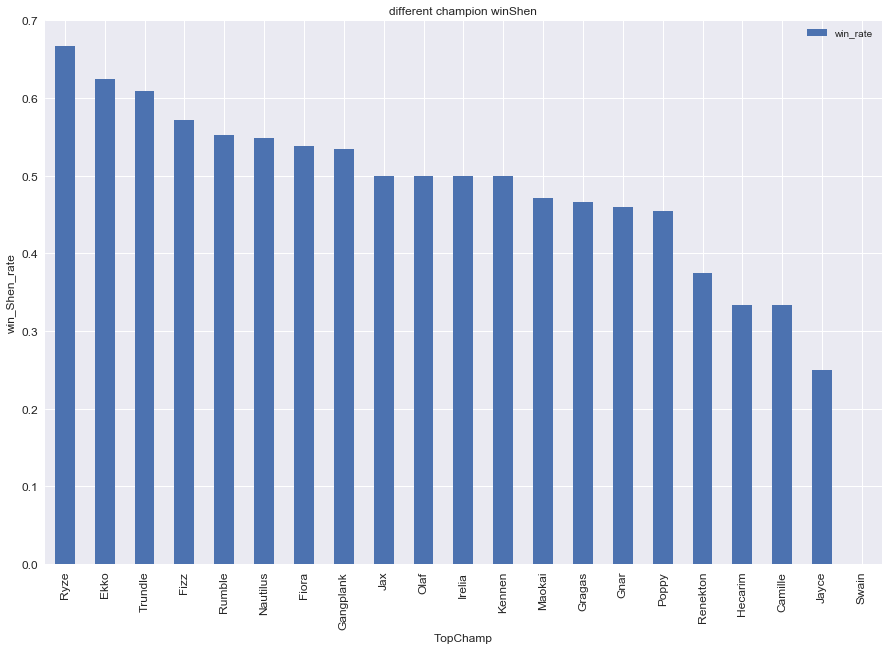

In [257]:
get_graph("Shen","Top")

,count(*),win_rate
Gnar,8,0.750000
JarvanIV,6,0.666667
Trundle,9,0.666667
Maokai,135,0.511111
Gangplank,10,0.500000
Rumble,46,0.500000
Gragas,35,0.485714
Poppy,75,0.480000
Fiora,13,0.461538
Shen,62,0.451613


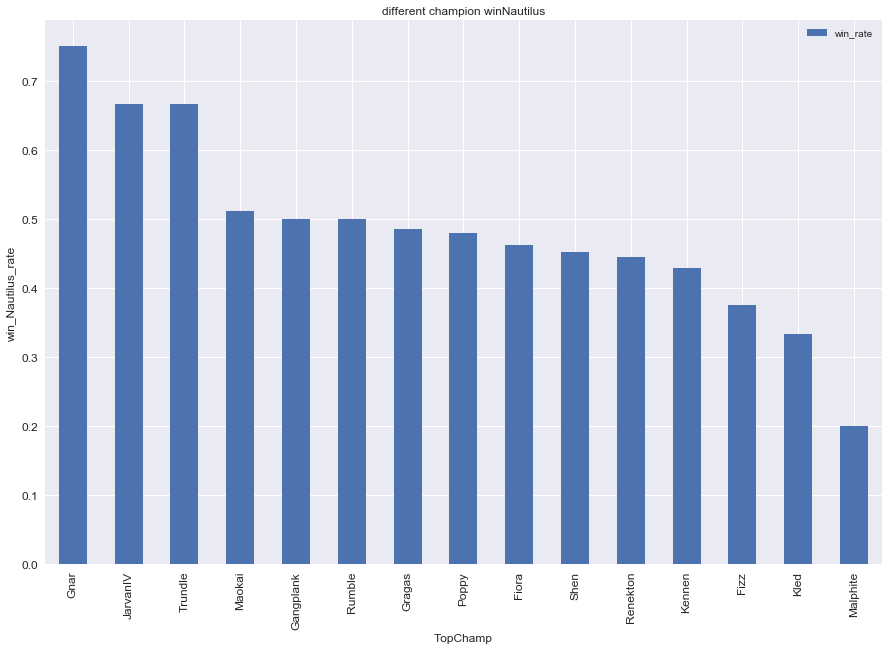

In [258]:
get_graph("Nautilus","Top")

,count(*),win_rate
Zac,9,0.777778
Khazix,43,0.720930
Skarner,6,0.666667
Nunu,32,0.656250
Nidalee,114,0.622807
Rengar,11,0.545455
Hecarim,28,0.535714
Gragas,386,0.525907
Vi,23,0.521739
LeeSin,94,0.521277


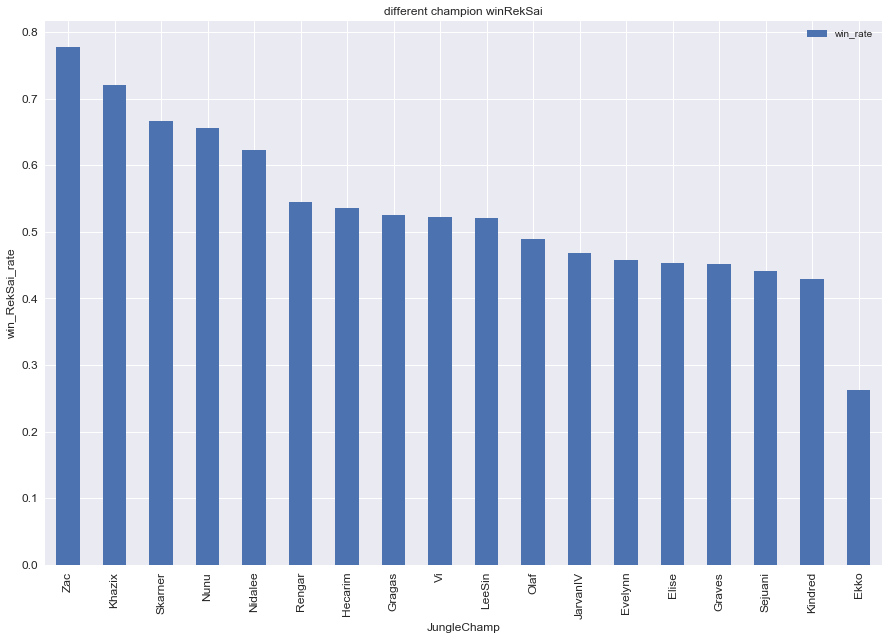

In [261]:
get_graph("RekSai","Jungle")

,count(*),win_rate
Kindred,47,0.553191
Graves,38,0.552632
Nidalee,87,0.517241
Rengar,18,0.500000
Olaf,8,0.500000
LeeSin,56,0.482143
RekSai,386,0.474093
Khazix,11,0.454545
Elise,167,0.449102
Sejuani,36,0.444444


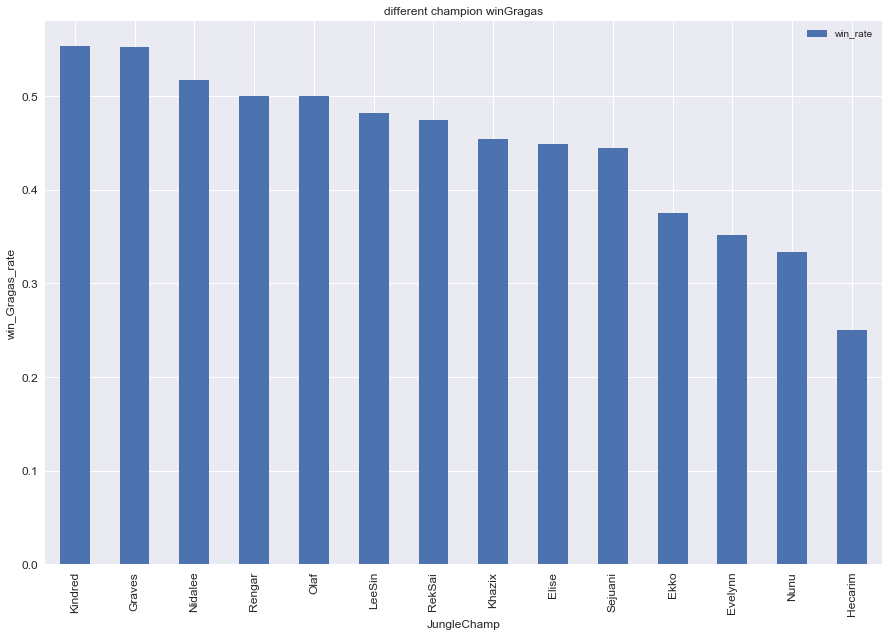

In [262]:
get_graph("Gragas","Jungle")

,count(*),win_rate
Ivern,6,0.833333
Rengar,30,0.600000
Olaf,21,0.571429
Hecarim,16,0.562500
Gragas,167,0.550898
RekSai,245,0.546939
LeeSin,110,0.527273
Ekko,6,0.500000
Khazix,70,0.500000
Graves,138,0.485507


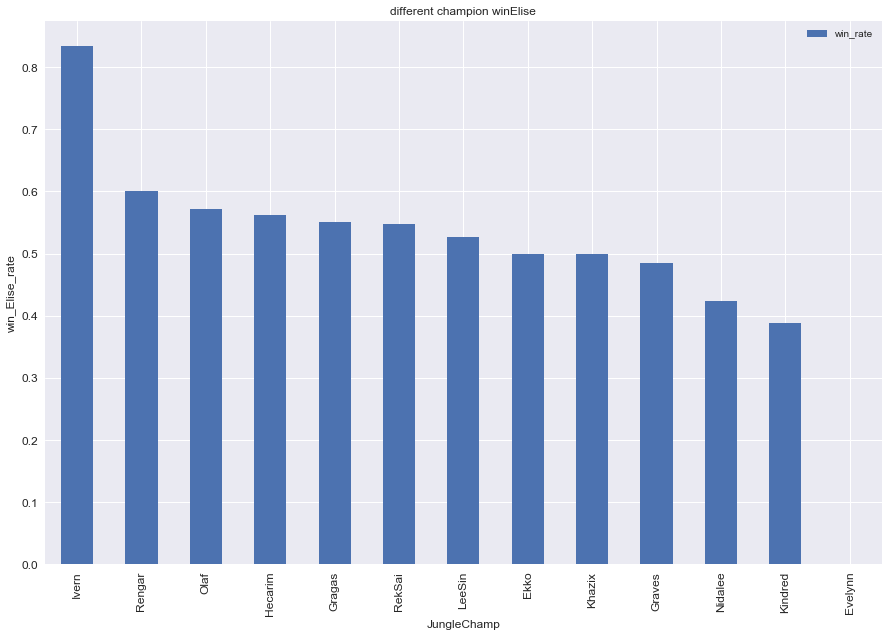

In [263]:
get_graph("Elise","Jungle")

,count(*),win_rate
Sejuani,10,0.800000
Evelynn,14,0.642857
JarvanIV,80,0.575000
Olaf,27,0.555556
Nidalee,43,0.534884
Rengar,62,0.532258
Gragas,56,0.517857
Khazix,114,0.517544
Ivern,10,0.500000
RekSai,94,0.478723


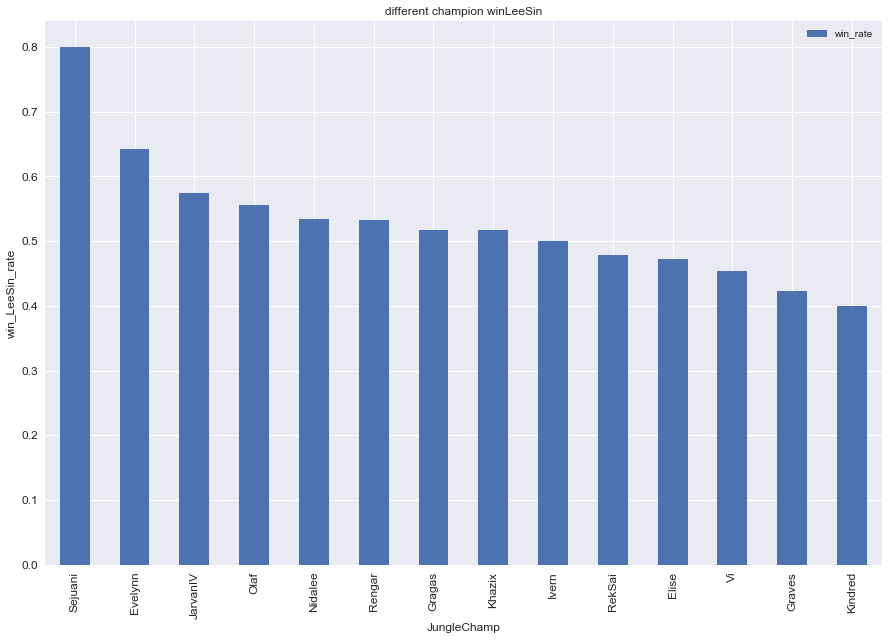

In [264]:
get_graph("LeeSin","Jungle")

,count(*),win_rate
Elise,104,0.576923
Evelynn,8,0.500000
Gragas,87,0.482759
LeeSin,43,0.465116
Hecarim,9,0.444444
Kindred,40,0.425000
RekSai,114,0.377193
Graves,56,0.303571
JarvanIV,15,0.200000


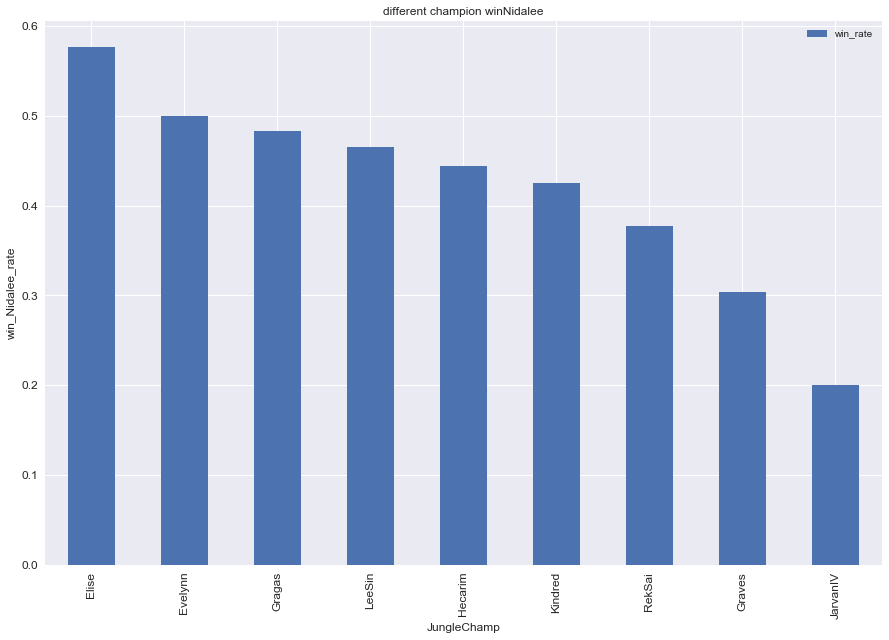

In [265]:
get_graph("Nidalee","Jungle")

,count(*),win_rate
KogMaw,6,1.000000
Zed,10,0.900000
Corki,22,0.727273
Syndra,10,0.700000
Zilean,28,0.678571
Malzahar,15,0.666667
Quinn,6,0.666667
Swain,12,0.666667
Ezreal,15,0.666667
Vladimir,29,0.655172


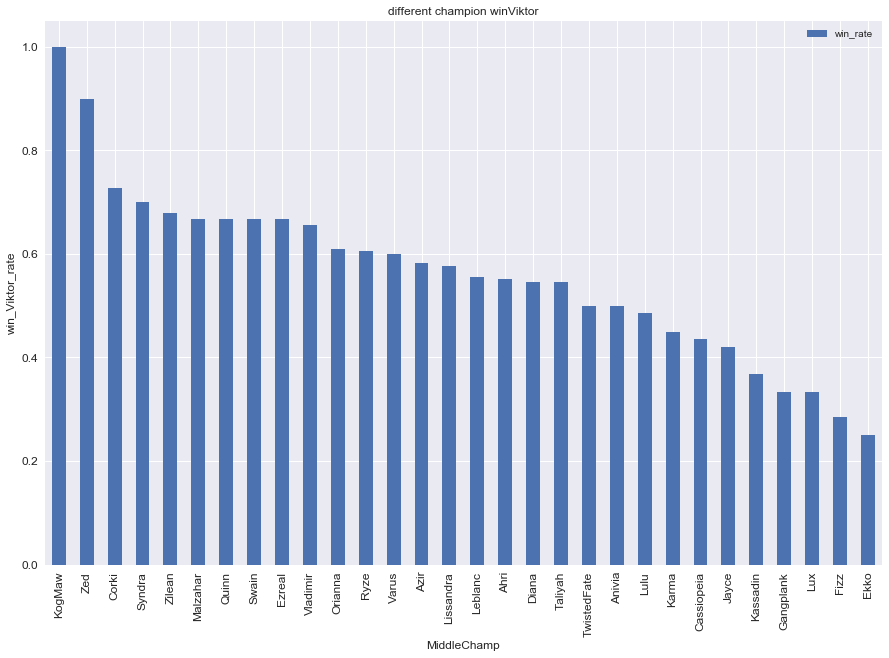

In [267]:
get_graph("Viktor","Middle")

,count(*),win_rate
Fizz,9,0.666667
Vladimir,24,0.666667
Varus,44,0.590909
Leblanc,68,0.573529
Cassiopeia,25,0.560000
Ryze,34,0.558824
KogMaw,11,0.545455
Zed,15,0.533333
TwistedFate,10,0.500000
Swain,6,0.500000


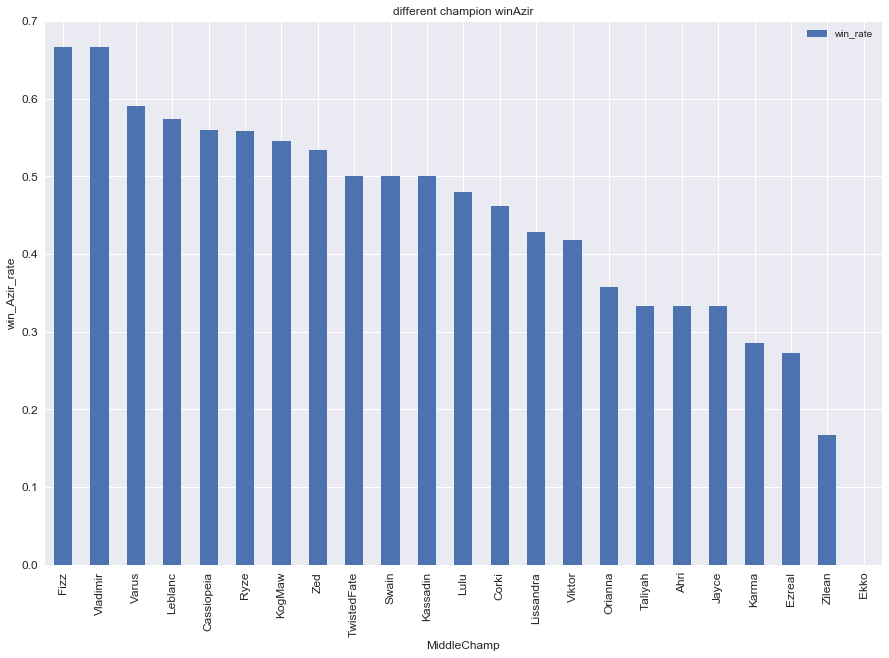

In [17]:
get_graph("Azir","Middle")

,count(*),win_rate
Kassadin,28,0.750000
Lulu,24,0.625000
Zed,18,0.611111
Karma,7,0.571429
Morgana,7,0.571429
Cassiopeia,7,0.571429
Corki,29,0.551724
Zilean,11,0.545455
Syndra,13,0.538462
Ryze,28,0.500000


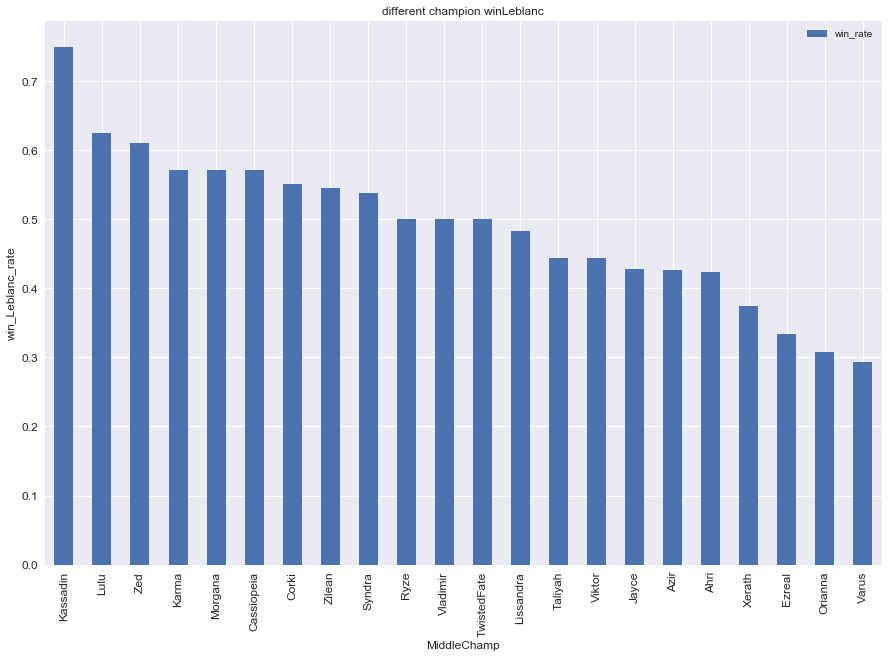

In [268]:
get_graph("Leblanc","Middle")

,count(*),win_rate
Ahri,8,1.000000
AurelionSol,8,0.875000
Malzahar,10,0.800000
Talon,7,0.714286
Zed,6,0.666667
Lulu,7,0.571429
Syndra,26,0.538462
Taliyah,13,0.538462
Leblanc,28,0.500000
Orianna,27,0.481481


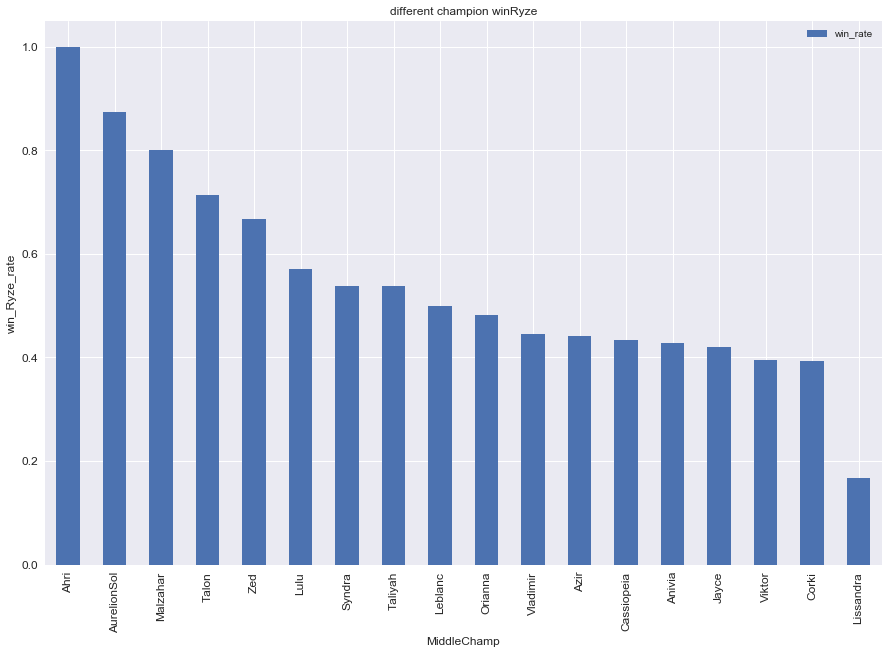

In [269]:
get_graph("Ryze","Middle")

,count(*),win_rate
Talon,6,0.666667
Malzahar,21,0.619048
Anivia,38,0.605263
Orianna,17,0.588235
Syndra,19,0.578947
Taliyah,14,0.571429
Cassiopeia,32,0.562500
Ryze,27,0.555556
Swain,9,0.555556
Karma,23,0.521739


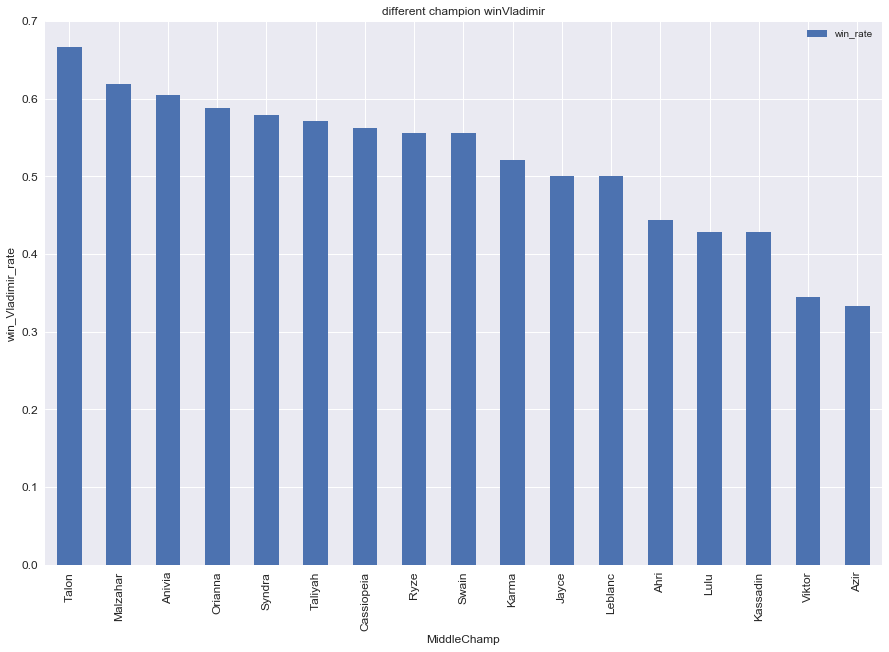

In [270]:
get_graph("Vladimir","Middle")

,count(*),win_rate
AurelionSol,7,0.714286
Leblanc,13,0.692308
Ahri,31,0.677419
Zed,12,0.666667
Kassadin,6,0.666667
Azir,14,0.642857
Syndra,35,0.628571
Jayce,15,0.600000
Cassiopeia,32,0.531250
Ryze,27,0.518519


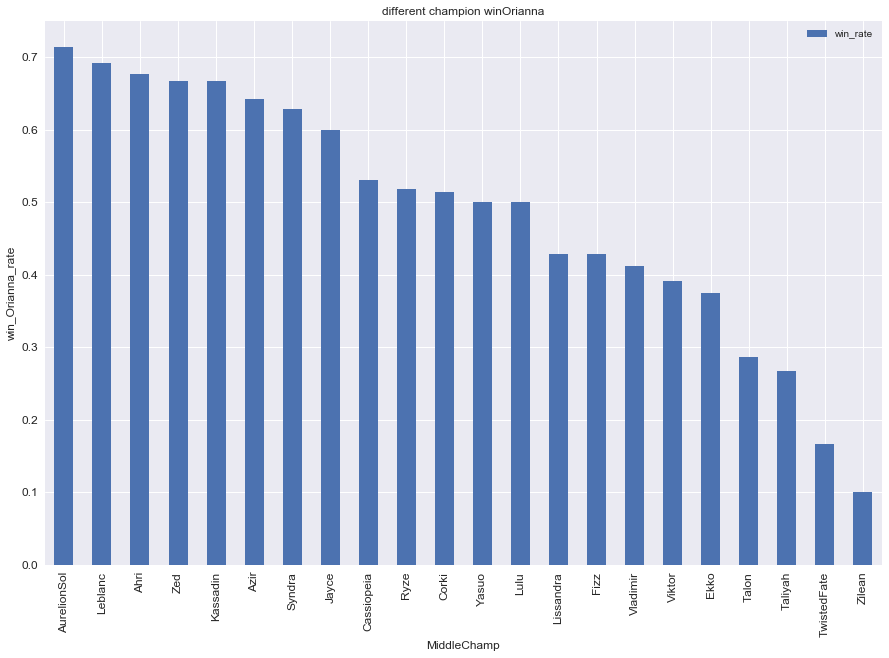

In [271]:
get_graph("Orianna","Middle")

,count(*),win_rate
Lissandra,8,0.875000
Zed,11,0.636364
Corki,22,0.590909
Ahri,26,0.576923
Fizz,9,0.555556
Leblanc,13,0.461538
Ryze,26,0.461538
Jayce,18,0.444444
Vladimir,19,0.421053
Ekko,39,0.410256


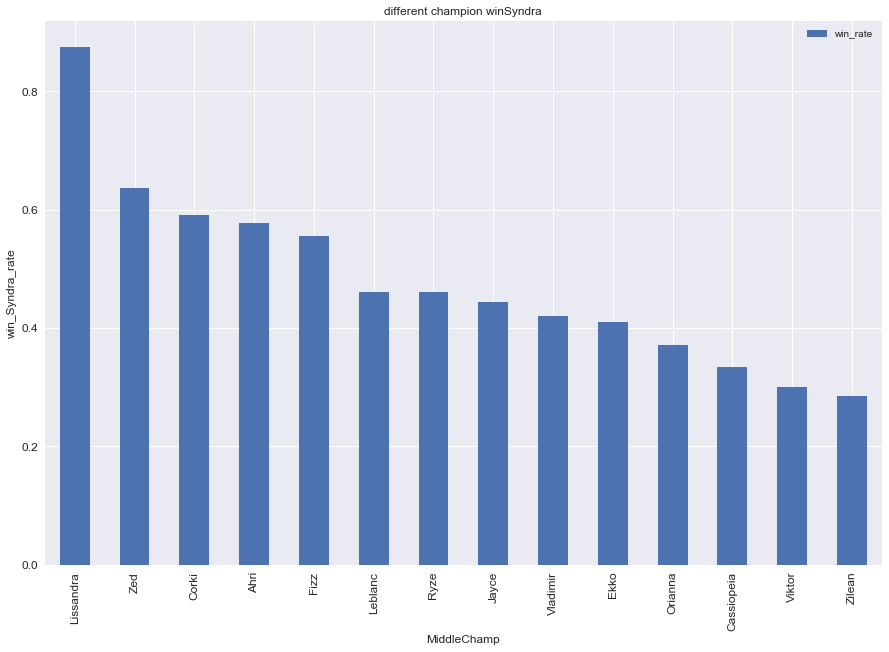

In [272]:
get_graph("Syndra","Middle")

,count(*),win_rate
Cassiopeia,11,0.727273
Lissandra,13,0.692308
Azir,9,0.666667
Kassadin,14,0.642857
Zed,23,0.608696
Jayce,15,0.600000
Leblanc,33,0.575758
Taliyah,16,0.562500
Vladimir,9,0.555556
TwistedFate,8,0.500000


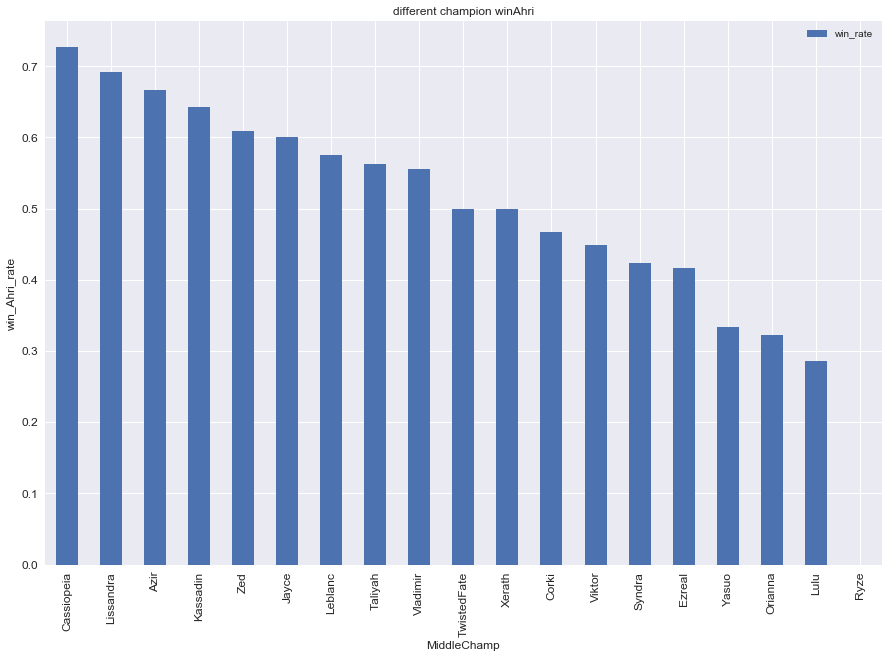

In [273]:
get_graph("Ahri","Middle")

,count(*),win_rate
Twitch,18,0.611111
Kalista,103,0.514563
Vayne,66,0.500000
Jhin,114,0.500000
Urgot,20,0.500000
Varus,16,0.500000
Ashe,132,0.484848
Jinx,51,0.470588
Corki,140,0.457143
Ezreal,81,0.456790


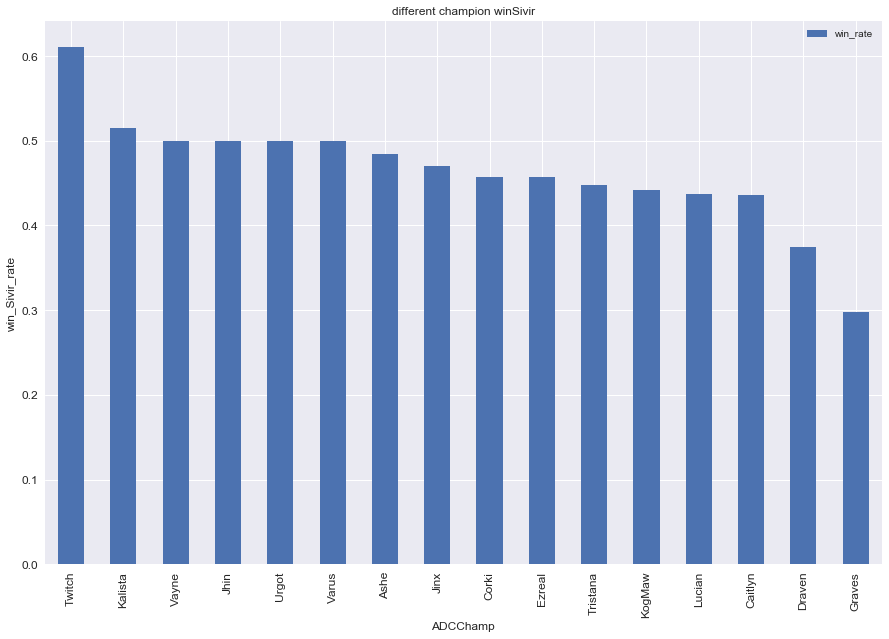

In [275]:
get_graph("Sivir","ADC")

,count(*),win_rate
Graves,14,0.714286
Jhin,60,0.600000
Kalista,133,0.593985
Twitch,17,0.588235
Vayne,12,0.583333
MissFortune,7,0.571429
Sivir,229,0.563319
Corki,102,0.529412
Ashe,65,0.523077
Varus,17,0.470588


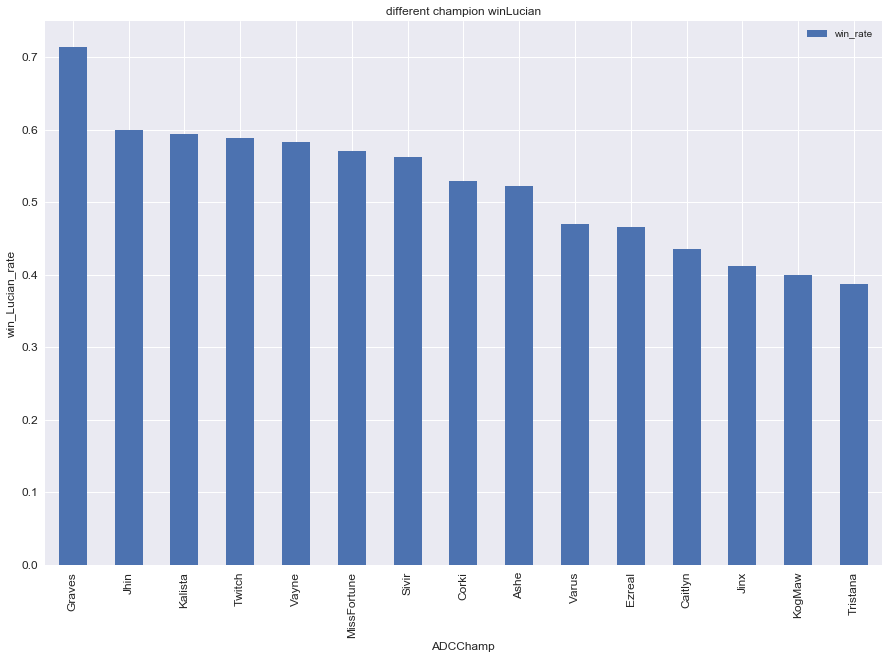

In [276]:
get_graph("Lucian","ADC")

,count(*),win_rate
Kalista,28,0.571429
Ziggs,9,0.555556
Varus,137,0.540146
Sivir,132,0.515152
Ezreal,146,0.486301
Lucian,65,0.476923
Caitlyn,64,0.468750
Jhin,224,0.450893
Corki,6,0.333333
KogMaw,15,0.333333


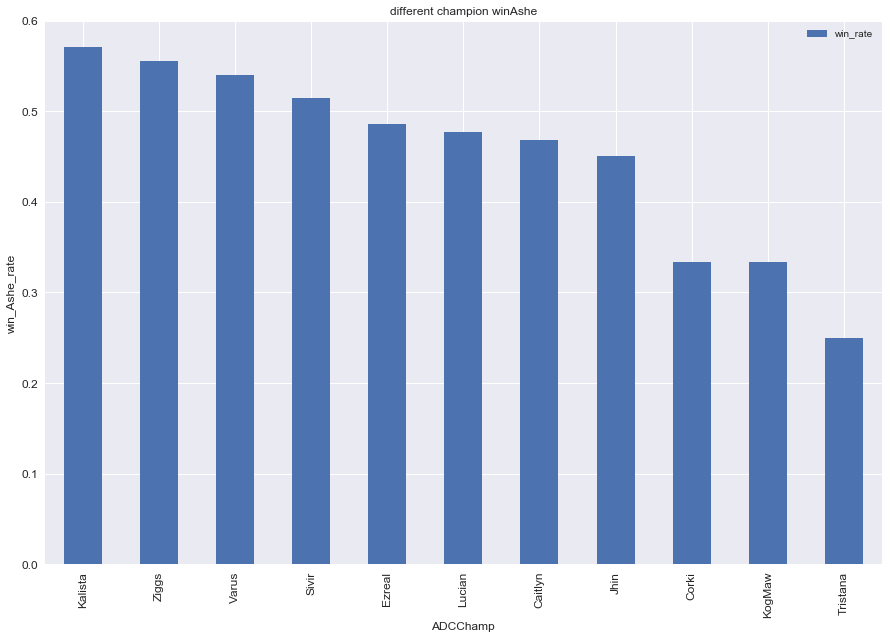

In [277]:
get_graph("Ashe","ADC")

,count(*),win_rate
Kalista,10,0.600000
Ashe,224,0.549107
Caitlyn,63,0.507937
Tristana,8,0.500000
Ziggs,16,0.500000
Sivir,114,0.500000
KogMaw,6,0.500000
Ezreal,121,0.421488
Lucian,60,0.400000
Varus,114,0.394737


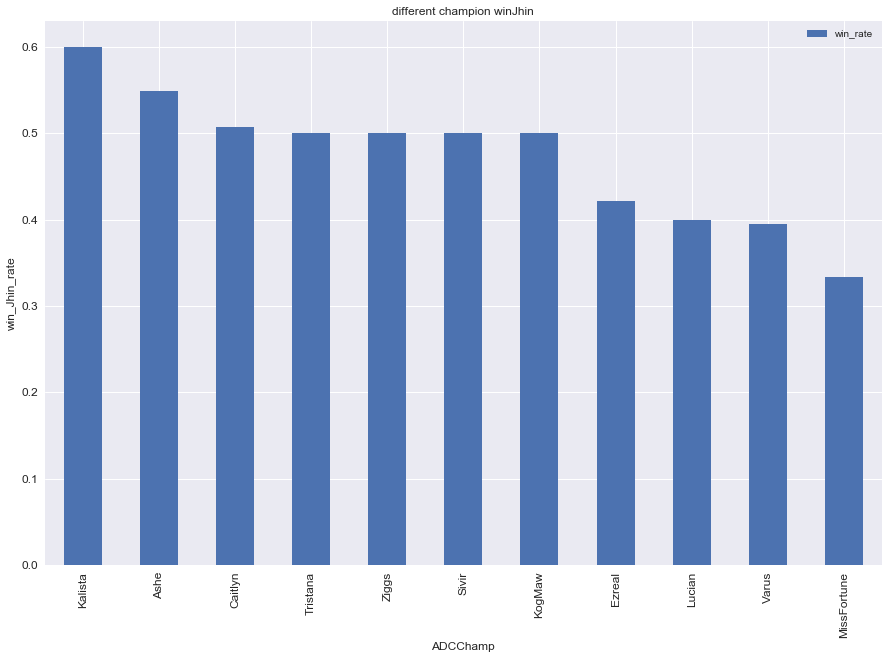

In [279]:
get_graph("Jhin","ADC")

,count(*),win_rate
Corki,43,0.581395
Jhin,121,0.578512
Kalista,59,0.576271
Caitlyn,54,0.555556
Ziggs,11,0.545455
Sivir,81,0.543210
Varus,26,0.538462
Lucian,159,0.534591
Ashe,146,0.513699
KogMaw,13,0.384615


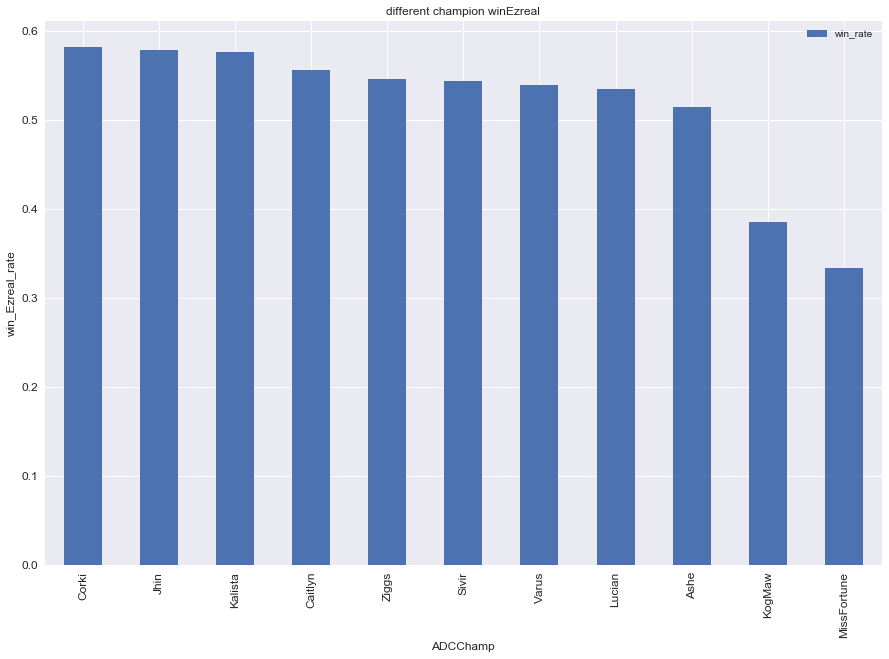

In [280]:
get_graph("Ezreal","ADC")

,count(*),win_rate
Urgot,22,0.681818
KogMaw,16,0.562500
Graves,21,0.523810
Caitlyn,21,0.523810
Sivir,103,0.485437
Jinx,15,0.466667
Ashe,28,0.428571
Ezreal,59,0.423729
Corki,83,0.409639
Lucian,133,0.406015


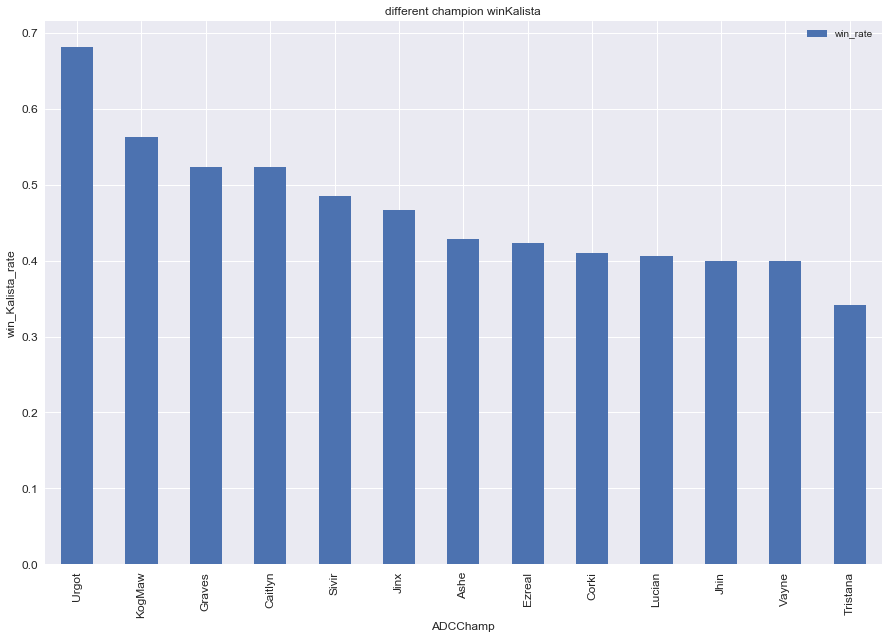

In [281]:
get_graph("Kalista","ADC")

,count(*),win_rate
Caitlyn,14,0.714286
Graves,44,0.681818
Ashe,6,0.666667
Kalista,83,0.590361
Sivir,140,0.542857
Lucian,102,0.470588
KogMaw,41,0.463415
Vayne,13,0.461538
Tristana,40,0.450000
Ezreal,43,0.418605


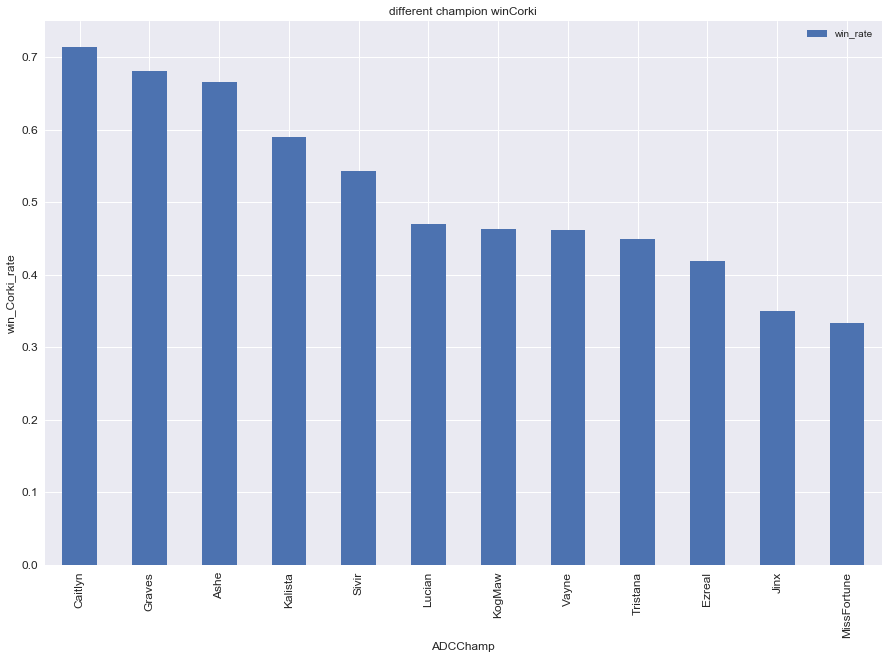

In [282]:
get_graph("Corki","ADC")

,count(*),win_rate
Malzahar,6,1.000000
Zyra,8,0.875000
TahmKench,45,0.666667
Nami,11,0.636364
Shen,16,0.625000
Leona,12,0.583333
Lulu,7,0.571429
Thresh,164,0.548780
Morgana,64,0.546875
Trundle,90,0.544444


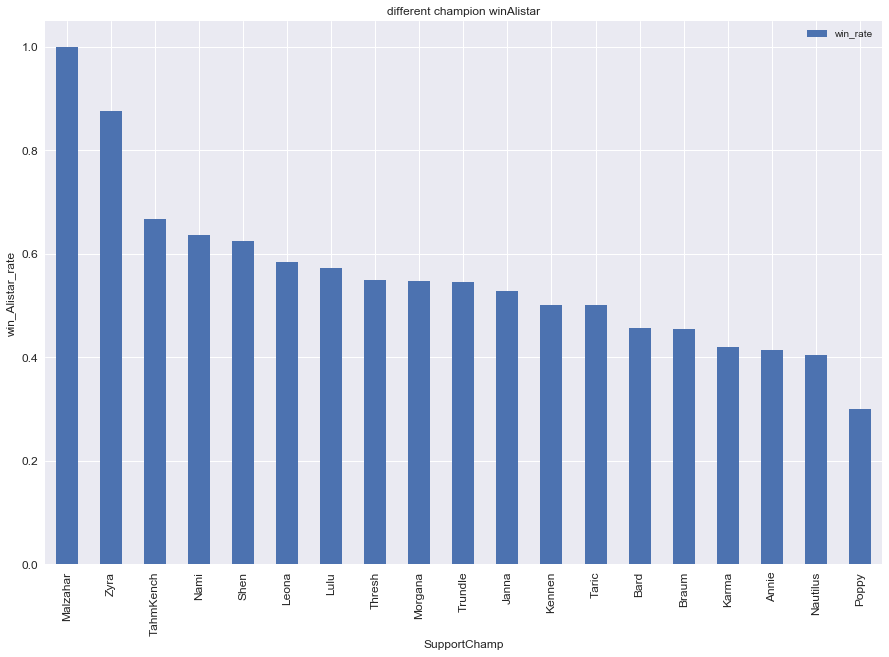

In [285]:
get_graph("Alistar","Support")

,count(*),win_rate
TahmKench,26,0.692308
Shen,11,0.636364
Kennen,8,0.625000
Morgana,59,0.593220
Bard,39,0.564103
Trundle,19,0.526316
Annie,63,0.523810
Leona,27,0.481481
Nautilus,77,0.480519
Braum,134,0.462687


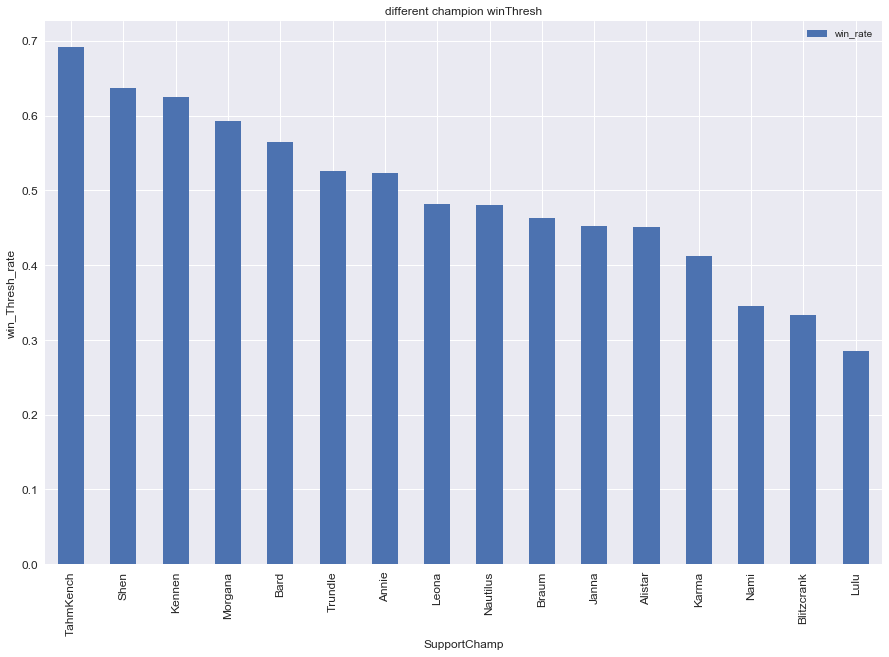

In [286]:
get_graph("Thresh","Support")

,count(*),win_rate
Taric,36,0.666667
Nami,30,0.666667
Nautilus,18,0.666667
Janna,54,0.666667
Soraka,26,0.615385
Morgana,28,0.571429
Bard,97,0.546392
Alistar,222,0.545045
Thresh,134,0.537313
Trundle,79,0.531646


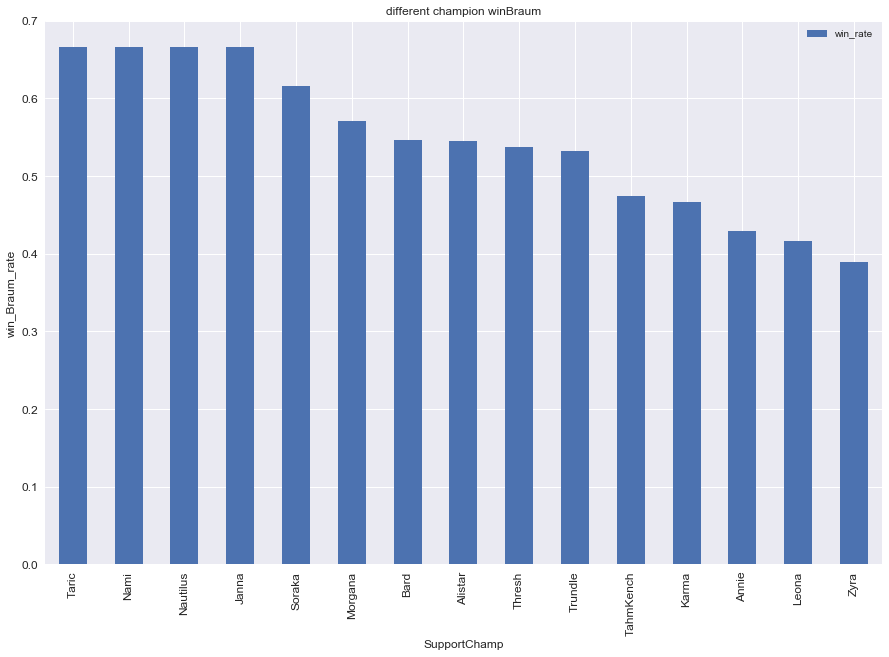

In [287]:
get_graph("Braum","Support")

,count(*),win_rate
Taric,8,0.750000
Nautilus,16,0.625000
TahmKench,31,0.612903
Lulu,97,0.608247
Thresh,63,0.587302
Alistar,31,0.580645
Sona,9,0.555556
Bard,50,0.540000
Braum,120,0.533333
Zyra,102,0.529412


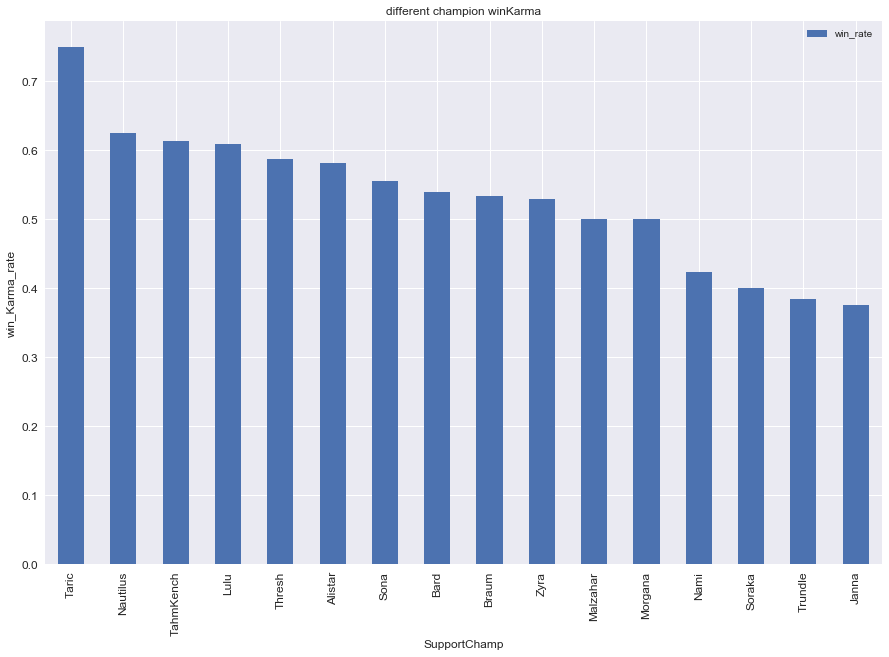

In [288]:
get_graph("Karma","Support")

,count(*),win_rate
Annie,39,0.666667
Karma,16,0.625000
Thresh,95,0.547368
Morgana,43,0.534884
Lulu,10,0.500000
Alistar,91,0.472527
Nautilus,38,0.447368
Leona,16,0.437500
Nami,41,0.365854
Braum,54,0.333333


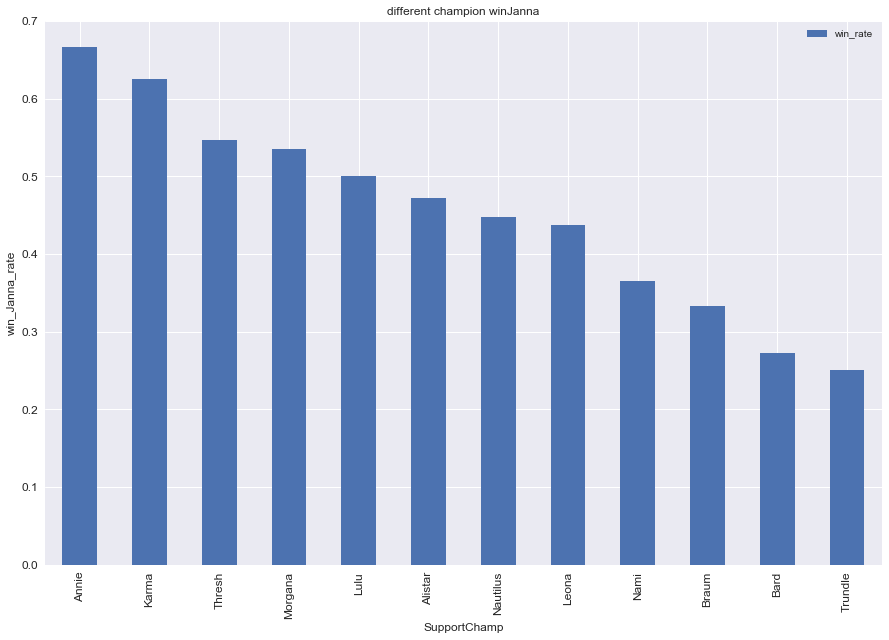

In [289]:
get_graph("Jannaget_graph("Alistar","Support")","Support")

,count(*),win_rate
Janna,11,0.727273
Taric,6,0.666667
TahmKench,19,0.631579
Morgana,12,0.583333
Alistar,68,0.544118
Soraka,13,0.538462
Trundle,16,0.500000
Karma,50,0.460000
Braum,97,0.453608
Zyra,9,0.444444


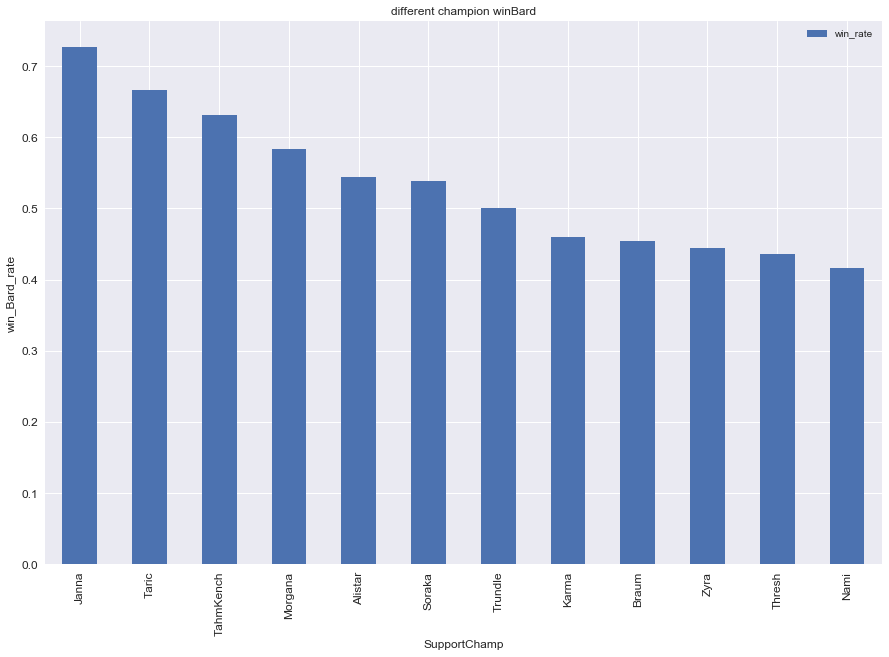

In [290]:
get_graph("Bard","Support")